In [1]:
%pylab notebook
import matplotlib.pyplot as plt
from charistools.timeSeries import TimeSeries
import datetime as dt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


/Users/brodzik/.conda/envs/pmesdr/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
drainageids = ['AM_Vakhsh_at_Komsomolabad',
               'IN_Hunza_at_DainyorBridge',
               'GA_Karnali_at_Benighat',
               'GA_Narayani_at_Devghat',
               'GA_SaptaKosi_at_Chatara']

<IPython.core.display.Javascript object>


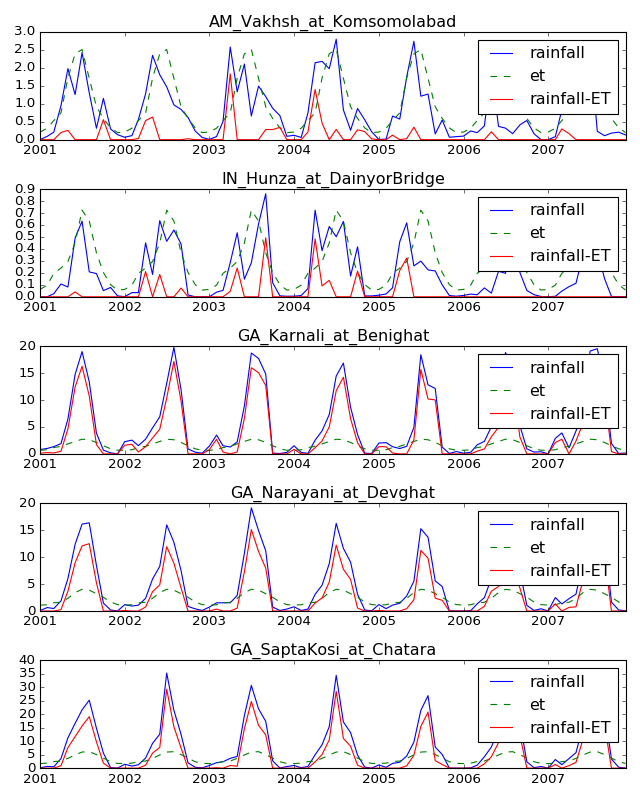

In [3]:
fig, ax = plt.subplots(5,1, figsize=(8,10))

In [5]:
for i, id in enumerate(drainageids):
    rainfallFile = '/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/monthly_by_drainage/' + id + \
        '.APHRODITE_rainfall_km3.monthly.csv'
    ETFile = '/Users/brodzik/projects/CHARIS/evaporation/merra/' + id + '.merra.ET_clim.txt'
    rainfall = TimeSeries(rainfallFile)
    et_df = pd.read_csv(ETFile)
    et_df = et_df.set_index('month')
    for j in rainfall.data.index:
        month = j.month
        rainfall.data.loc[j,'et_km3'] = et_df.loc[month]['ET_km3']
    new = rainfall.data['rainfall'] - rainfall.data['et_km3']
    new[new < 0.] = 0.
    rainfall.data['rainfall-et_km3'] = new
    ax[i].plot(rainfall.data['rainfall'], color='b', label='rainfall')
    ax[i].plot(rainfall.data['et_km3'], '--', color='g', label='et')
    ax[i].plot(rainfall.data['rainfall-et_km3'], color='r', label='rainfall-ET')
    ax[i].set_title(id)
    ax[i].legend()
    newFile = '/Users/brodzik/projects/CHARIS/rainfall/Aphrodite_V1101R2/' \
        + 'monthly_by_drainage_less_et/' \
        + id + '.APHRODITE_rainfall_adj_merra_ETclim_km3.monthly.csv'
    rainfall.comments = rainfall.comments + [
        str(dt.datetime.now()) + ' MJB subtracted MERRA climatology ET']
    rainfall.write(newFile)
plt.tight_layout()        

In [6]:
plt.savefig('calibration_basins.rainfall-ET.png')

In [7]:
rainfallFile = '/Users/brodzik/projects/CHARIS/rainfall/' \
    + 'Aphrodite_V1101R2/monthly_by_drainage_less_et/' + id + \
    '.APHRODITE_rainfall_adj_merra_ETclim_km3.monthly.csv'

In [8]:
rainfall = TimeSeries(rainfallFile)


In [9]:
rainfall.comments


['# Source for rainfall: APHRODITE V1101R2 0.25x0.25 degree precipitation data',
 '# Location for rainfall data: /Volumes/CHARIS/rainfall/Aphrodite_V1101R2',
 '# Source for basins masks: Created by SJSK',
 '# Location for basin mask data: /projects/CHARIS/basins/basin_MODIS_tiles',
 '# Coverted from mm/day to km3/month for GA SaptaKosi at Chatara by Karl Rittger on 20-Jun-2016',
 '# Units: km^3',
 '# 2016-07-22 17:23:39.445776 MJB subtracted MERRA climatology ET',
 '# COLUMNS: year month day doy rainfall et_km3 rainfall-et_km3']

In [10]:
rainfall.data


,doy,rainfall,et_km3,rainfall-et_km3
datetime,,,,
2001-01-01,1,0.105464,1.710863,0.000000
2001-02-01,32,0.656665,1.861141,0.000000
2001-03-01,60,0.509126,2.439136,0.000000
2001-04-01,91,3.552392,2.641434,0.910958
2001-05-01,121,11.256944,3.629804,7.627140
2001-06-01,152,16.622332,4.901391,11.720940
2001-07-01,182,21.652996,5.982240,15.670756
2001-08-01,213,25.236864,6.115179,19.121685
2001-09-01,244,14.824512,5.034330,9.790183
